In [122]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [123]:
def savefile(name, fig) : 
    os.makedirs("../outputs", exist_ok=True)
    fname = f"../outputs/{name}.jpg"
    fig.savefig(fname, dpi=300, bbox_inches='tight')
    print(f"Saved figure to {fname}")

In [124]:
df = pd.read_csv("../data/where/USA.csv")[["avganncount", "target_deathrate", "incidencerate", "geography"]]

In [125]:
def colMeanMultiple(df, cols):
    """
    Estrae la geografia (stato) e calcola la media delle colonne specificate per stato.
    """
    df_tmp = df[cols + ["geography"]].copy()
    df_tmp["geography"] = df_tmp["geography"].str.split(",").str[1].str.strip()
    df_grouped = df_tmp.groupby("geography", as_index=False).agg({col: "mean" for col in cols})
    
    return df_grouped


In [126]:
df = pd.read_csv("../data/where/USA.csv")[["avganncount", "target_deathrate", "incidencerate", "geography"]]
df = colMeanMultiple(df, ["avganncount", "target_deathrate", "incidencerate"])
df

,geography,avganncount,target_deathrate,incidencerate
0,Alabama,383.841270,192.728571,462.641270
1,Alaska,139.555556,193.416667,409.538889
2,Arizona,1803.400000,149.086667,354.000000
3,Arkansas,196.826667,200.090667,433.710667
4,California,2754.070175,158.096491,430.461404
5,Colorado,350.016667,141.561667,385.911667
6,Connecticut,2538.000000,157.712500,479.862500
7,Delaware,1722.333333,178.866667,502.133333
8,District of Columbia,2881.000000,182.300000,483.700000
9,Florida,1602.045455,179.430303,435.143939


In [127]:
df["avganncount"].isna().sum(), df["target_deathrate"].isna().sum(), df["incidencerate"].isna().sum()


(np.int64(0), np.int64(0), np.int64(0))

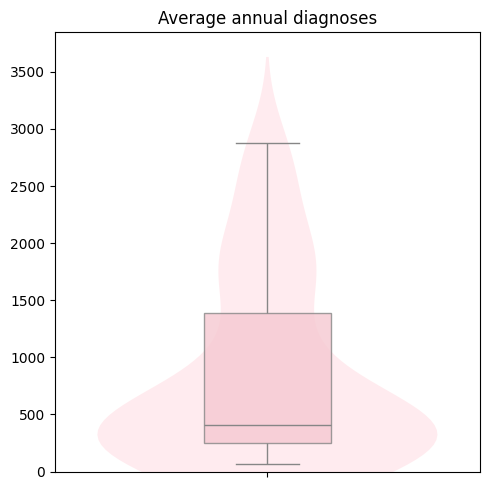

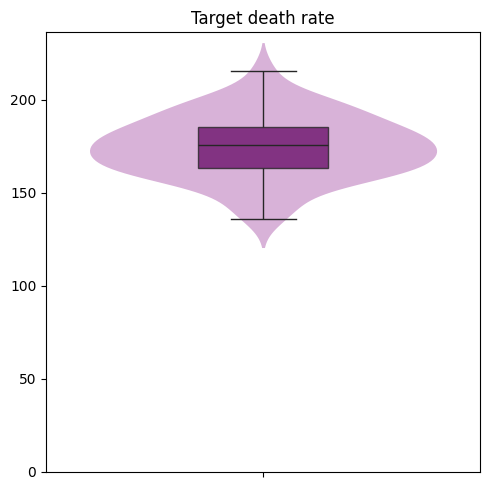

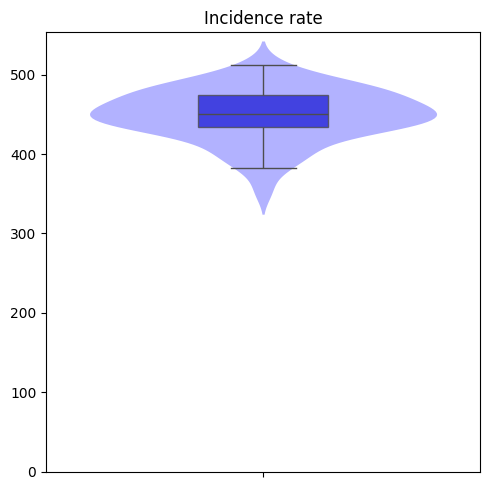

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["avganncount", "target_deathrate", "incidencerate"]
colors = ['pink', 'purple', 'blue']
col_titles = ['Average annual diagnoses', 'Target death rate', 'Incidence rate']

for col, color in zip(columns, colors):

    plt.figure(figsize=(5, 5))  # NUOVA figura per ogni grafico

    vp = sns.violinplot(data=df[col], color=color,
                        inner=None, linewidth=0, saturation=1)

    for patch in vp.collections:
        patch.set_alpha(0.3)

    bp = sns.boxplot(data=df[col], color=color, width=0.3,
                     boxprops={'zorder': 2}, saturation=0.7, showfliers=False)

    for patch in bp.patches:
        patch.set_alpha(0.8)

    plt.title(col_titles[columns.index(col)])
    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(bottom = 0)
    plt.tight_layout()
    plt.show()


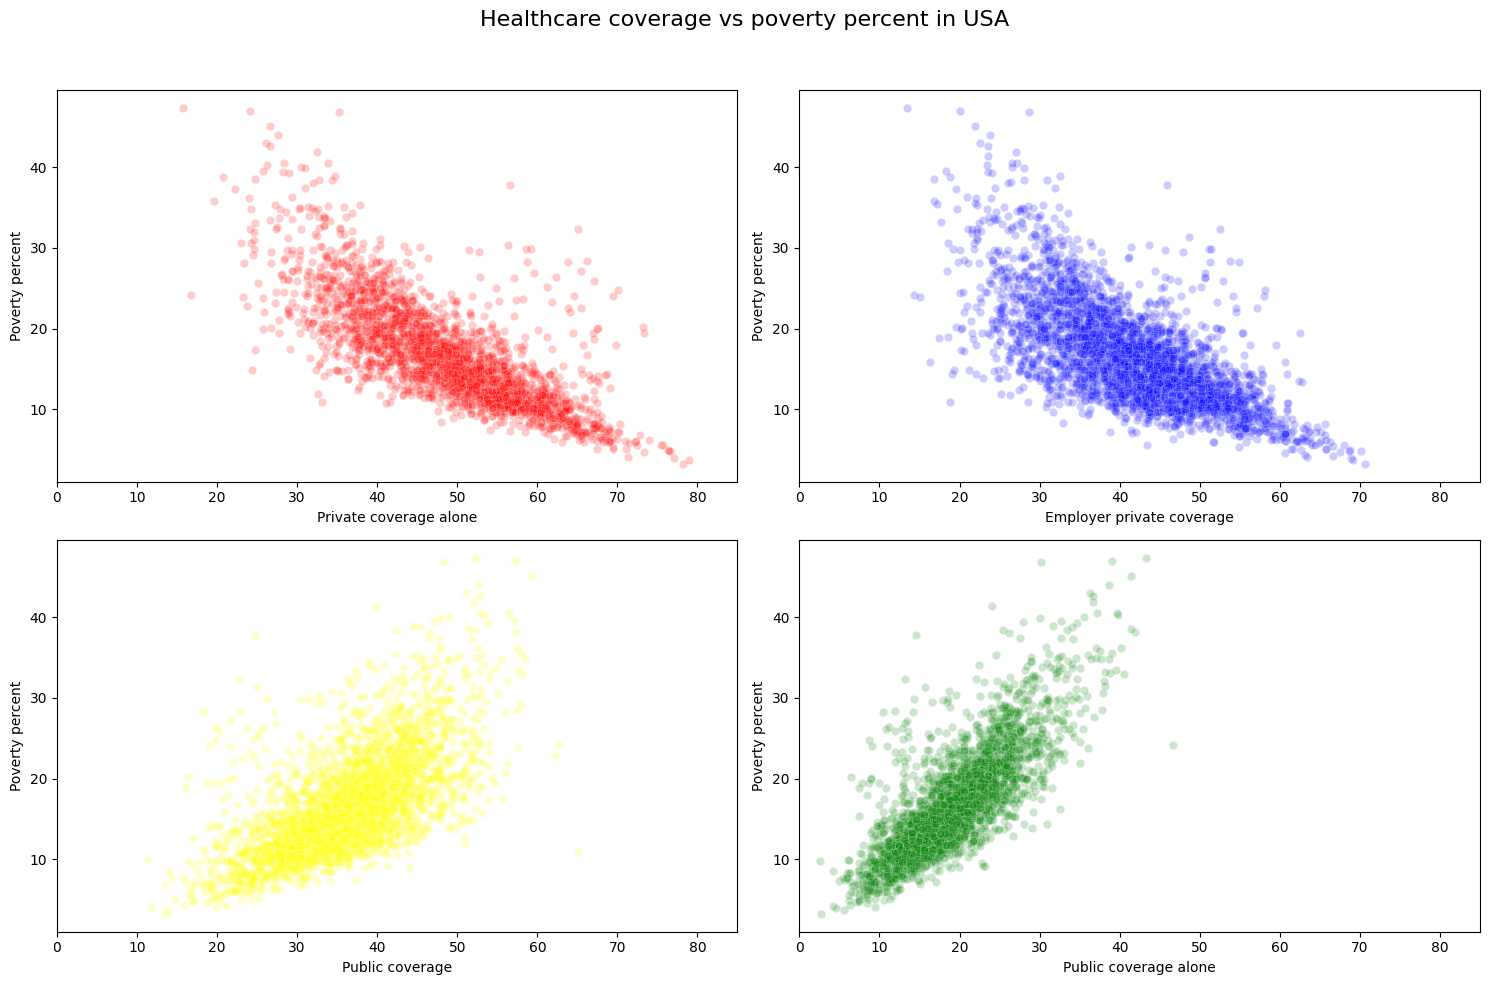

Saved figure to ../outputs/USA_scatter_healthcare_poverty.jpg


In [137]:
df = pd.read_csv("../data/where/USA.csv")[[
    "pctprivatecoveragealone",
    "pctempprivcoverage",
    "pctpubliccoverage",
    "pctpubliccoveragealone",
    "povertypercent",
    "geography"
]]

columns = ["pctprivatecoveragealone", "pctempprivcoverage",
           "pctpubliccoverage", "pctpubliccoveragealone"]

colors = ['red', 'blue', 'yellow', 'green']

col_titles = [
    'Private coverage alone',
    'Employer private coverage',
    'Public coverage',
    'Public coverage alone'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# TITOLO GENERALE DI TUTTI I GRAFICI
fig.suptitle('Healthcare coverage vs poverty percent in USA', fontsize=16)

for ax, col, color in zip(axes, columns, colors):
    sns.scatterplot(data=df, x=col, y='povertypercent',
                    color=color, alpha=0.2, ax=ax)
    ax.set_xlabel(col_titles[columns.index(col)])
    ax.set_ylabel('Poverty percent')
    ax.set_xlim(0, 85)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # lascia spazio al titolo
plt.show()

savefile("USA_scatter_healthcare_poverty", fig)
